<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [1]:
!git clone -l -s https://github.com/tobnie/gaze_predictor_nn.git cloned_repo

%cd cloned_repo

Cloning into 'cloned_repo'...
remote: Enumerating objects: 2240, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 2240 (delta 202), reused 267 (delta 165), pack-reused 1922
Receiving objects: 100% (2240/2240), 1.08 GiB | 31.64 MiB/s, done.
Resolving deltas: 100% (527/527), done.
Checking out files: 100% (1191/1191), done.
/content/cloned_repo


General Hyperparameters:

In [1]:
epochs = 100

# FC NN - Full State Input Flat

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetwork

fc_nn = FCNetwork(name='fc_nn', configuration = nn_configuration)
fc_nn.create_model()

X shape: (73530, 300)
Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861
Trainable params: 260,861
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
fc_nn.train()

Epoch 1/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.1648 - root_mean_squared_error: 2.0408 - val_loss: 3.7720 - val_root_mean_squared_error: 1.9422
Epoch 2/100
1471/1471 [==============================] - 5s 3ms/step - loss: 3.3455 - root_mean_squared_error: 1.8291 - val_loss: 3.2348 - val_root_mean_squared_error: 1.7986
Epoch 3/100
1471/1471 [==============================] - 5s 3ms/step - loss: 2.8263 - root_mean_squared_error: 1.6812 - val_loss: 2.9409 - val_root_mean_squared_error: 1.7149
Epoch 4/100
1471/1471 [==============================] - 5s 3ms/step - loss: 2.3874 - root_mean_squared_error: 1.5451 - val_loss: 2.6826 - val_root_mean_squared_error: 1.6379
Epoch 5/100
1471/1471 [==============================] - 5s 3ms/step - loss: 2.0290 - root_mean_squared_error: 1.4244 - val_loss: 2.4988 - val_root_mean_squared_error: 1.5808
Epoch 6/100
1471/1471 [==============================] - 5s 3ms/step - loss: 1.7985 - root_mean_squared_error: 1.3411 - val_l

Evaluate Model:

460/460 [==============================] - 1s 2ms/step - loss: 1.2550 - root_mean_squared_error: 1.1203

Test root_mean_squared_error: 1.120273470878601

Test loss: 1.2550127506256104


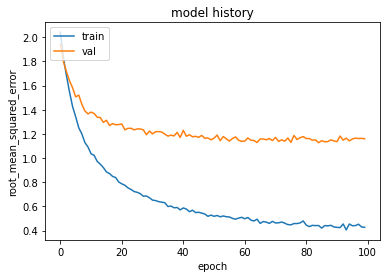

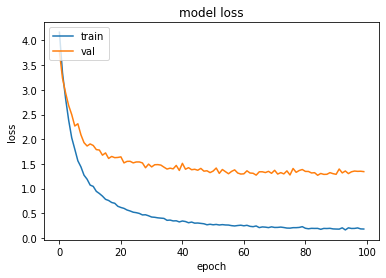

(1.120273470878601, 1.2550127506256104)

In [ ]:
fc_nn.evaluate()

# FC NN - Player Position Input

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 2,
    'input_shape': (2,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkPlayerPosInput

fc_nn_player_pos = FCNetworkPlayerPosInput(name='fc_nn_player_pos', configuration = nn_configuration)
fc_nn_player_pos.create_model()

X shape: (73530, 2)
Created model for fc_nn_player_pos:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 2)                 6         
                                                                 
 Hidden1 (Dense)             (None, 512)               1536      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 17,991
Trainable params: 17,991
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
fc_nn_player_pos.train()

Epoch 1/100
1471/1471 [==============================] - 4s 2ms/step - loss: 4.4148 - root_mean_squared_error: 2.1011 - val_loss: 4.1277 - val_root_mean_squared_error: 2.0317
Epoch 2/100
1471/1471 [==============================] - 3s 2ms/step - loss: 4.2782 - root_mean_squared_error: 2.0684 - val_loss: 4.1412 - val_root_mean_squared_error: 2.0350
Epoch 3/100
1471/1471 [==============================] - 3s 2ms/step - loss: 4.2291 - root_mean_squared_error: 2.0565 - val_loss: 4.0644 - val_root_mean_squared_error: 2.0160
Epoch 4/100
1471/1471 [==============================] - 3s 2ms/step - loss: 4.1882 - root_mean_squared_error: 2.0465 - val_loss: 4.0744 - val_root_mean_squared_error: 2.0185
Epoch 5/100
1471/1471 [==============================] - 3s 2ms/step - loss: 4.1700 - root_mean_squared_error: 2.0421 - val_loss: 4.0428 - val_root_mean_squared_error: 2.0107
Epoch 6/100
1471/1471 [==============================] - 3s 2ms/step - loss: 4.1542 - root_mean_squared_error: 2.0382 - val_l

Evaluate Model:

460/460 [==============================] - 1s 1ms/step - loss: 4.0662 - root_mean_squared_error: 2.0165

Test root_mean_squared_error: 2.016477346420288

Test loss: 4.066181182861328


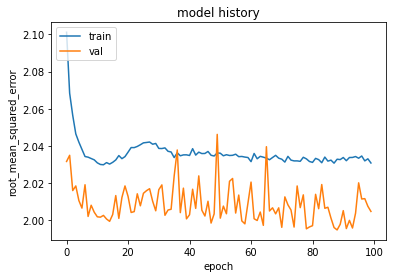

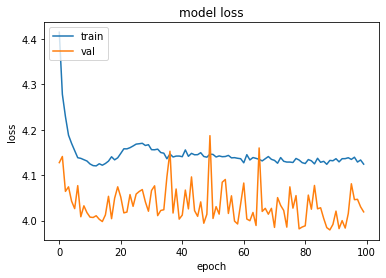

(2.016477346420288, 4.066181182861328)

In [ ]:
fc_nn_player_pos.evaluate()

# FC NN - Situation (+ Player Pos) Input

7x7 Situation Input:

X shape: (73530, 51)
Created model for fc_nn_situation:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 51)                2652      
                                                                 
 Hidden1 (Dense)             (None, 512)               26624     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 45,725
Trainable params: 45,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 4s 3ms/step - loss: 4.0841 - root_mean_squared_error: 2.0209 - v

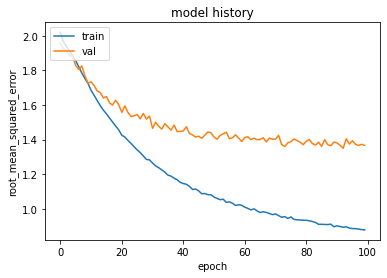

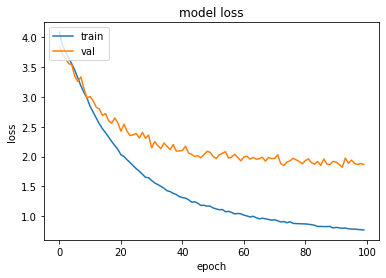

(1.3407676219940186, 1.7976579666137695)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 51,
    'input_shape': (51,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

5x5 Situation Input:

X shape: (73530, 27)
Created model for fc_nn_situation:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 27)                756       
                                                                 
 Hidden1 (Dense)             (None, 512)               14336     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 31,541
Trainable params: 31,541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 4s 2ms/step - loss: 4.1072 - root_mean_squared_error: 2.0266 - v

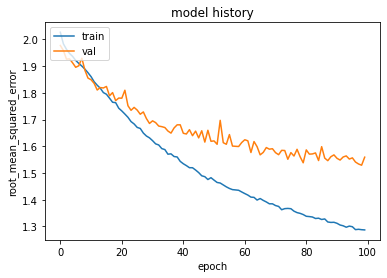

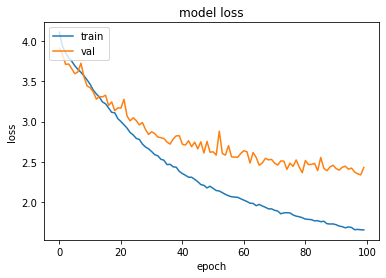

(1.5876505374908447, 2.520634174346924)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 27,
    'input_shape': (27,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=5)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

3x3 Situation Input:

X shape: (73530, 11)
Created model for fc_nn_situation:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 11)                132       
                                                                 
 Hidden1 (Dense)             (None, 512)               6144      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 22,725
Trainable params: 22,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 4s 2ms/step - loss: 4.2463 - root_mean_squared_error: 2.0607 - v

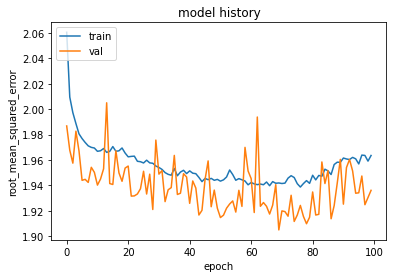

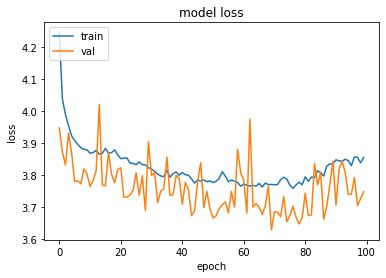

(1.9518400430679321, 3.8096797466278076)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 11,
    'input_shape': (11,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=3)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

# ConvNet

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.convolutional import ConvNetwork

conv_nn = ConvNetwork(name='conv_nn', configuration = nn_configuration)
conv_nn.create_model()

Created model for conv_nn:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 15, 20, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 64)        0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 Dense1 (Dense)            

Train Model:

In [ ]:
conv_nn.train()

Epoch 1/100
1471/1471 [==============================] - 15s 10ms/step - loss: 4.2355 - root_mean_squared_error: 2.0580 - val_loss: 3.8177 - val_root_mean_squared_error: 1.9539
Epoch 2/100
1471/1471 [==============================] - 15s 10ms/step - loss: 3.2327 - root_mean_squared_error: 1.7980 - val_loss: 2.9787 - val_root_mean_squared_error: 1.7259
Epoch 3/100
1471/1471 [==============================] - 15s 10ms/step - loss: 2.2810 - root_mean_squared_error: 1.5103 - val_loss: 2.6928 - val_root_mean_squared_error: 1.6410
Epoch 4/100
1471/1471 [==============================] - 15s 10ms/step - loss: 1.7795 - root_mean_squared_error: 1.3340 - val_loss: 2.3744 - val_root_mean_squared_error: 1.5409
Epoch 5/100
1471/1471 [==============================] - 15s 10ms/step - loss: 1.4492 - root_mean_squared_error: 1.2038 - val_loss: 2.2904 - val_root_mean_squared_error: 1.5134
Epoch 6/100
1471/1471 [==============================] - 15s 10ms/step - loss: 1.2049 - root_mean_squared_error: 1.

Evaluate Model:

460/460 [==============================] - 2s 3ms/step - loss: 1.4477 - root_mean_squared_error: 1.2032

Test root_mean_squared_error: 1.203198790550232

Test loss: 1.4476873874664307


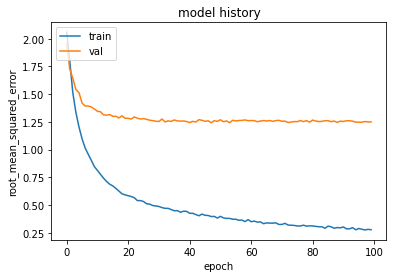

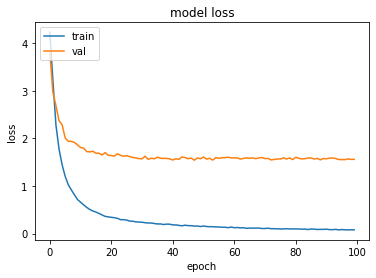

(1.203198790550232, 1.4476873874664307)

In [ ]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [2]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

NameError: ignored

Create Model:

In [ ]:
from gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration)
conv_nn_3d.create_model()

Train Model:

In [ ]:
conv_nn_3d.train()

Epoch 1/100
1471/1471 [==============================] - 13s 8ms/step - loss: 4.1655 - root_mean_squared_error: 2.0409 - val_loss: 3.6686 - val_root_mean_squared_error: 1.9153
Epoch 2/100
1471/1471 [==============================] - 12s 8ms/step - loss: 3.6120 - root_mean_squared_error: 1.9005 - val_loss: 3.3767 - val_root_mean_squared_error: 1.8376
Epoch 3/100
1471/1471 [==============================] - 12s 8ms/step - loss: 3.1965 - root_mean_squared_error: 1.7879 - val_loss: 3.1435 - val_root_mean_squared_error: 1.7730
Epoch 4/100
1471/1471 [==============================] - 12s 8ms/step - loss: 2.7505 - root_mean_squared_error: 1.6585 - val_loss: 2.8972 - val_root_mean_squared_error: 1.7021
Epoch 5/100
1471/1471 [==============================] - 13s 9ms/step - loss: 2.4250 - root_mean_squared_error: 1.5572 - val_loss: 2.7302 - val_root_mean_squared_error: 1.6523
Epoch 6/100
1471/1471 [==============================] - 13s 9ms/step - loss: 2.1886 - root_mean_squared_error: 1.4794 -

Evaluate Model:

460/460 [==============================] - 1s 3ms/step - loss: 1.7429 - root_mean_squared_error: 1.3202

Test root_mean_squared_error: 1.320190191268921

Test loss: 1.7429020404815674


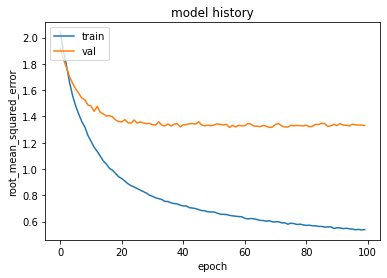

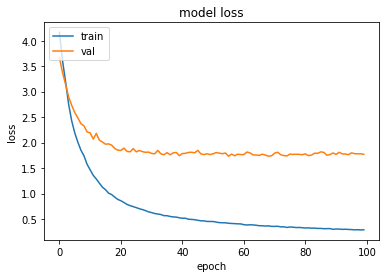

(1.320190191268921, 1.7429020404815674)

In [ ]:
conv_nn_3d.evaluate()

# ConvNet MultiInput - Situation plus Region

Configuration for NN:

In [ ]:
import tensorflow as tf

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': tf.keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.situation_input_architectures.conv_multi_input import MultiInputConvNetwork

multi_input_conv_nn = MultiInputConvNetwork(name='multi_input_conv_nn', configuration = nn_configuration)
multi_input_conv_nn.create_model()

X1 shape: (73530, 7, 7, 1)
X2 shape: (73530, 2)
X1 Input Shape:  (7, 7, 1)
X2 Input Shape:  (2,)
First Layer output: KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 64), dtype=tf.float32, name=None), name='Conv1/Relu:0', description="created by layer 'Conv1'")
got to end of cnn layer
after concatenation:
 KerasTensor(type_spec=TensorSpec(shape=(None, 514), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
got to end of dense layer
Created model for multi_input_conv_nn:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7, 1)]    0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 7, 7, 64)     166

Train Model:

In [ ]:
multi_input_conv_nn.train()

Epoch 1/100
1471/1471 [==============================] - 11s 7ms/step - loss: 4.0769 - root_mean_squared_error: 2.0191 - val_loss: 3.7385 - val_root_mean_squared_error: 1.9335
Epoch 2/100
1471/1471 [==============================] - 11s 7ms/step - loss: 3.7472 - root_mean_squared_error: 1.9358 - val_loss: 3.5414 - val_root_mean_squared_error: 1.8819
Epoch 3/100
1471/1471 [==============================] - 10s 7ms/step - loss: 3.4681 - root_mean_squared_error: 1.8623 - val_loss: 3.3320 - val_root_mean_squared_error: 1.8254
Epoch 4/100
1471/1471 [==============================] - 10s 7ms/step - loss: 3.1652 - root_mean_squared_error: 1.7791 - val_loss: 3.1775 - val_root_mean_squared_error: 1.7826
Epoch 5/100
1471/1471 [==============================] - 10s 7ms/step - loss: 2.8243 - root_mean_squared_error: 1.6806 - val_loss: 3.0885 - val_root_mean_squared_error: 1.7574
Epoch 6/100
1471/1471 [==============================] - 10s 7ms/step - loss: 2.5288 - root_mean_squared_error: 1.5902 -

Evaluate Model:

460/460 [==============================] - 5s 10ms/step - loss: 1.7824 - root_mean_squared_error: 1.3351

Test root_mean_squared_error: 1.335065484046936

Test loss: 1.7823997735977173


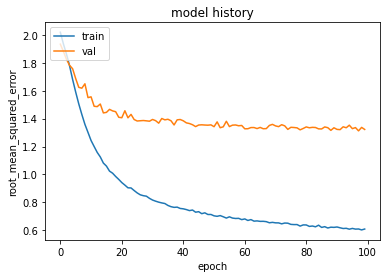

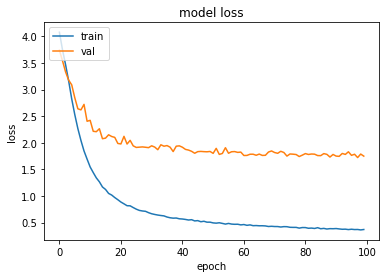

(1.335065484046936, 1.7823997735977173)

In [ ]:
multi_input_conv_nn.evaluate()

# Recurrent Network

Configuration for NN:

In [ ]:
from tensorflow import keras
from gaze_predictor.recurrent_network import RecurrentNetwork

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [ ]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_nn = RecurrentNetwork(name='lstm_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride)
  lstm_nn.create_model()
  lstm_nn.train()
  lstm_nn.evaluate()

Run for all timestep and stride combinations:

Train Data before: (57945, 1500)
Test Data before: (14486, 1500)
X_train after reshape: (57945, 5, 300)
X_test after reshape: (14486, 5, 300)
Created model for lstm_nn_timesteps=5_stride=5:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
________________________________________________________

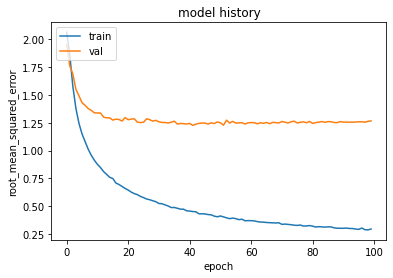

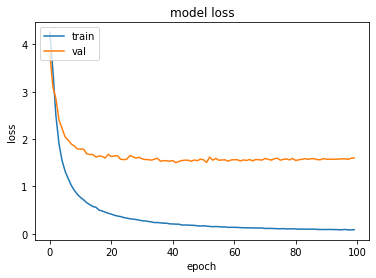

Train Data before: (57172, 1500)
Test Data before: (14292, 1500)
X_train after reshape: (57172, 5, 300)
X_test after reshape: (14292, 5, 300)
Created model for lstm_nn_timesteps=5_stride=10:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_______________________________________________________

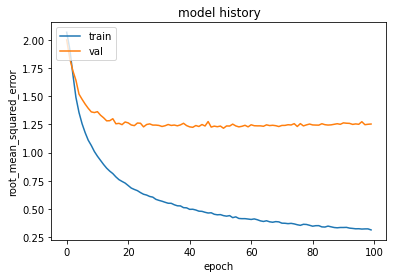

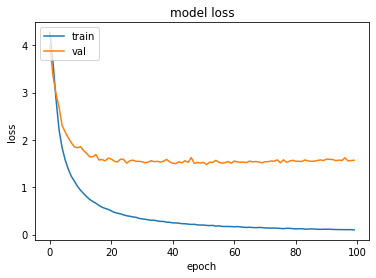

Train Data before: (56073, 1500)
Test Data before: (14018, 1500)
X_train after reshape: (56073, 5, 300)
X_test after reshape: (14018, 5, 300)
Created model for lstm_nn_timesteps=5_stride=20:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_______________________________________________________

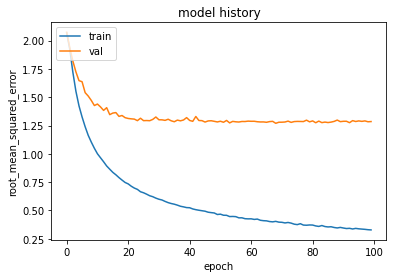

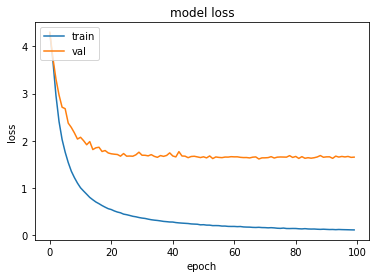

Train Data before: (55677, 6000)
Test Data before: (13919, 6000)
X_train after reshape: (55677, 20, 300)
X_test after reshape: (13919, 20, 300)
Created model for lstm_nn_timesteps=20_stride=5:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
____________________________________________________

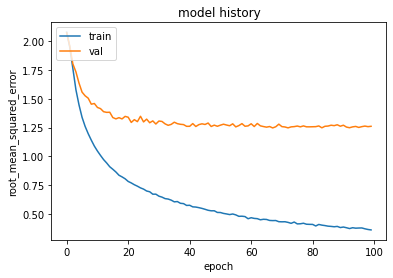

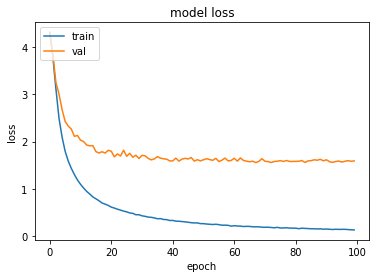

Train Data before: (53164, 6000)
Test Data before: (13290, 6000)
X_train after reshape: (53164, 20, 300)
X_test after reshape: (13290, 20, 300)
Created model for lstm_nn_timesteps=20_stride=10:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
___________________________________________________

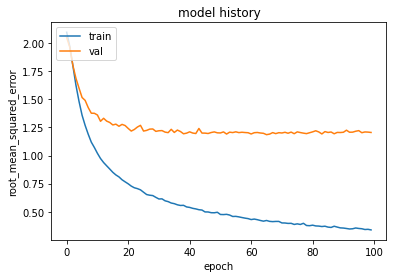

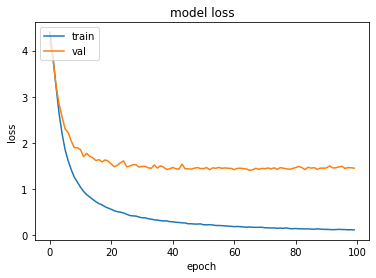

Train Data before: (48301, 6000)
Test Data before: (12075, 6000)
X_train after reshape: (48301, 20, 300)
X_test after reshape: (12075, 20, 300)
Created model for lstm_nn_timesteps=20_stride=20:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
___________________________________________________

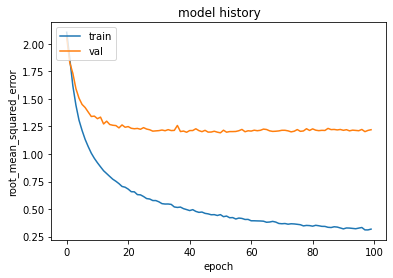

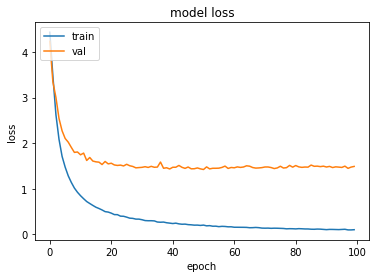

Train Data before: (51726, 15000)
Test Data before: (12931, 15000)
X_train after reshape: (51726, 50, 300)
X_test after reshape: (12931, 50, 300)
Created model for lstm_nn_timesteps=50_stride=5:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
__________________________________________________

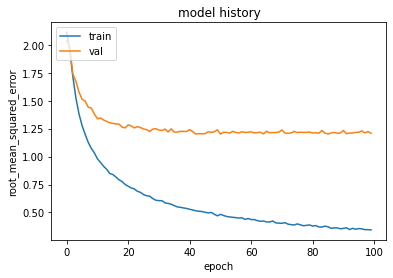

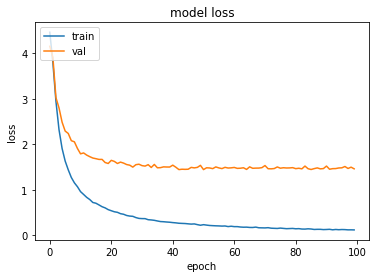

Train Data before: (45600, 15000)
Test Data before: (11399, 15000)
X_train after reshape: (45600, 50, 300)
X_test after reshape: (11399, 50, 300)
Created model for lstm_nn_timesteps=50_stride=10:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________

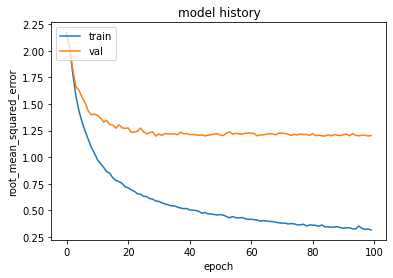

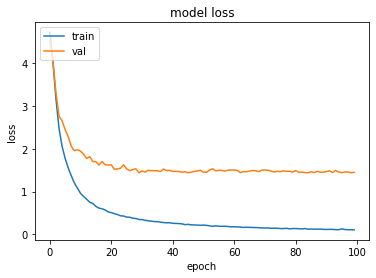

Train Data before: (34439, 15000)
Test Data before: (8609, 15000)
X_train after reshape: (34439, 50, 300)
X_test after reshape: (8609, 50, 300)
Created model for lstm_nn_timesteps=50_stride=20:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
___________________________________________________

In [ ]:
from itertools import product

timesteps = [5, 20, 50, 100]
strides = [5, 10, 20]

for t, s in product(timesteps, strides):
  create_and_run_lstm_model(t, s)

Train Data before: (34439, 15000)
Test Data before: (8609, 15000)
X_train after reshape: (34439, 50, 300)
X_test after reshape: (8609, 50, 300)
Created model for lstm_nn_timesteps=50_stride=20:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
______________________________________________________

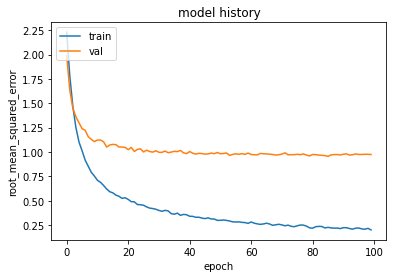

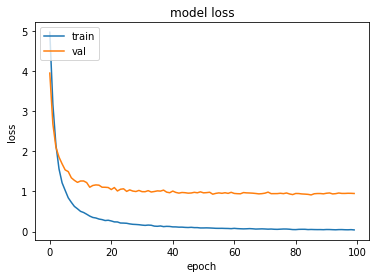

In [ ]:
create_and_run_lstm_model(50, 20)

Train Data before: (16512, 30000)
Test Data before: (4127, 30000)
X_train after reshape: (16512, 100, 300)
X_test after reshape: (4127, 100, 300)
Created model for lstm_nn_timesteps=100_stride=20:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________

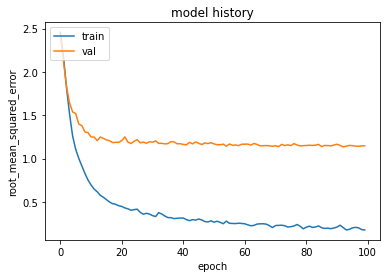

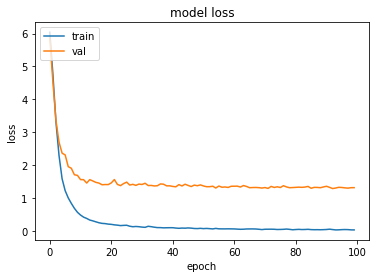

In [ ]:
create_and_run_lstm_model(100, 20)

# Recurrent Convolutional Network - Full State Input (Single Layer FM)

Configuration for NN:

In [2]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetwork
epochs = 50
nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [3]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_conv_nn = RecurrentConvNetwork(name='lstm_conv_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride)
  lstm_conv_nn.create_model()
  lstm_conv_nn.train()
  lstm_conv_nn.evaluate()

Run for all timestep and stride combinations:

Train Data before: (16512, 30000)
Test Data before: (4127, 30000)
X_train after reshape: (16512, 100, 15, 20, 1)
X_test after reshape: (4127, 100, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=100_stride=20:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                        

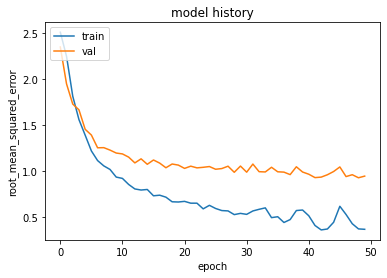

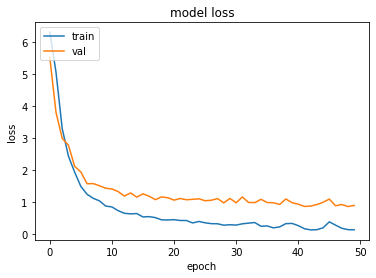

In [6]:
from itertools import product

timesteps = [20, 50, 100]
strides = [10, 20]


create_and_run_lstm_model(100, 20)

In [ ]:
create_and_run_lstm_model(50, 20)

Train Data before: (34439, 15000)
Test Data before: (8609, 15000)
X_train after reshape: (34439, 50, 15, 20, 1)
X_test after reshape: (8609, 50, 15, 20, 1)
Created model for lstm_conv_nn_timesteps=50_stride=20:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMConv (ConvLSTM2D)       (None, 15, 20, 16)        27264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv (Conv2D)               (None, 8, 10, 64)         9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 64)         0         
 2D)                                                             
                                           

# Recurrent Convolutional Network - Situation Input


Configuration for NN:

In [ ]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetworkSituationInput

epochs = 50
nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [ ]:
lstm_conv_nn = RecurrentConvNetworkSituationInput(name='lstm_conv_nn_situation_input', configuration = nn_configuration)
lstm_conv_nn.create_model()
lstm_conv_nn.train()
lstm_conv_nn.evaluate()

# FC NN - ELU

Configuration for NN:

In [ ]:
from tensorflow import keras
epochs = 100
nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkELU

fc_nn_elu = FCNetworkELU(name='fc_nn_elu', configuration = nn_configuration)
fc_nn_elu.create_model()

Train Model:

In [ ]:
fc_nn_elu.train()

Evaluate Model:

In [ ]:
fc_nn_elu.evaluate()

# FC NN - Dropout

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkDropout

fc_nn_dropout = FCNetworkDropout(name='fc_nn_dropout', configuration = nn_configuration)
fc_nn_dropout.create_model()

Train Model:

In [ ]:
fc_nn_dropout.train()

Evaluate Model:

In [ ]:
fc_nn_dropout.evaluate()

# FC NN - BatchNormalization

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkBatchNormalization

fc_nn_batch_norm = FCNetworkBatchNormalization(name='fc_nn_batch_norm', configuration = nn_configuration)
fc_nn_batch_norm.create_model()

Train Model:

In [ ]:
fc_nn_batch_norm.train()

Evaluate Model:

In [ ]:
fc_nn_batch_norm.evaluate()

In [ ]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()
# fc_nn_dropout.save_model()
# fc_nn_batch_norm.save_model()
# fc_nn_elu.save_model()

In [ ]:
# !zip -r /content/file.zip /content
# from google.colab import files
# files.download("/content/file.zip")